# Import packages

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, there are two types of approchs we can take:
1.regression problem to determine the weight of the fish

2.classification problem to determine the fish species

This notebook only focuses on the classification problem

In [58]:
dataset=pd.read_csv("Fish.csv")
df=dataset.copy()
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Understanding the data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [60]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [61]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [62]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

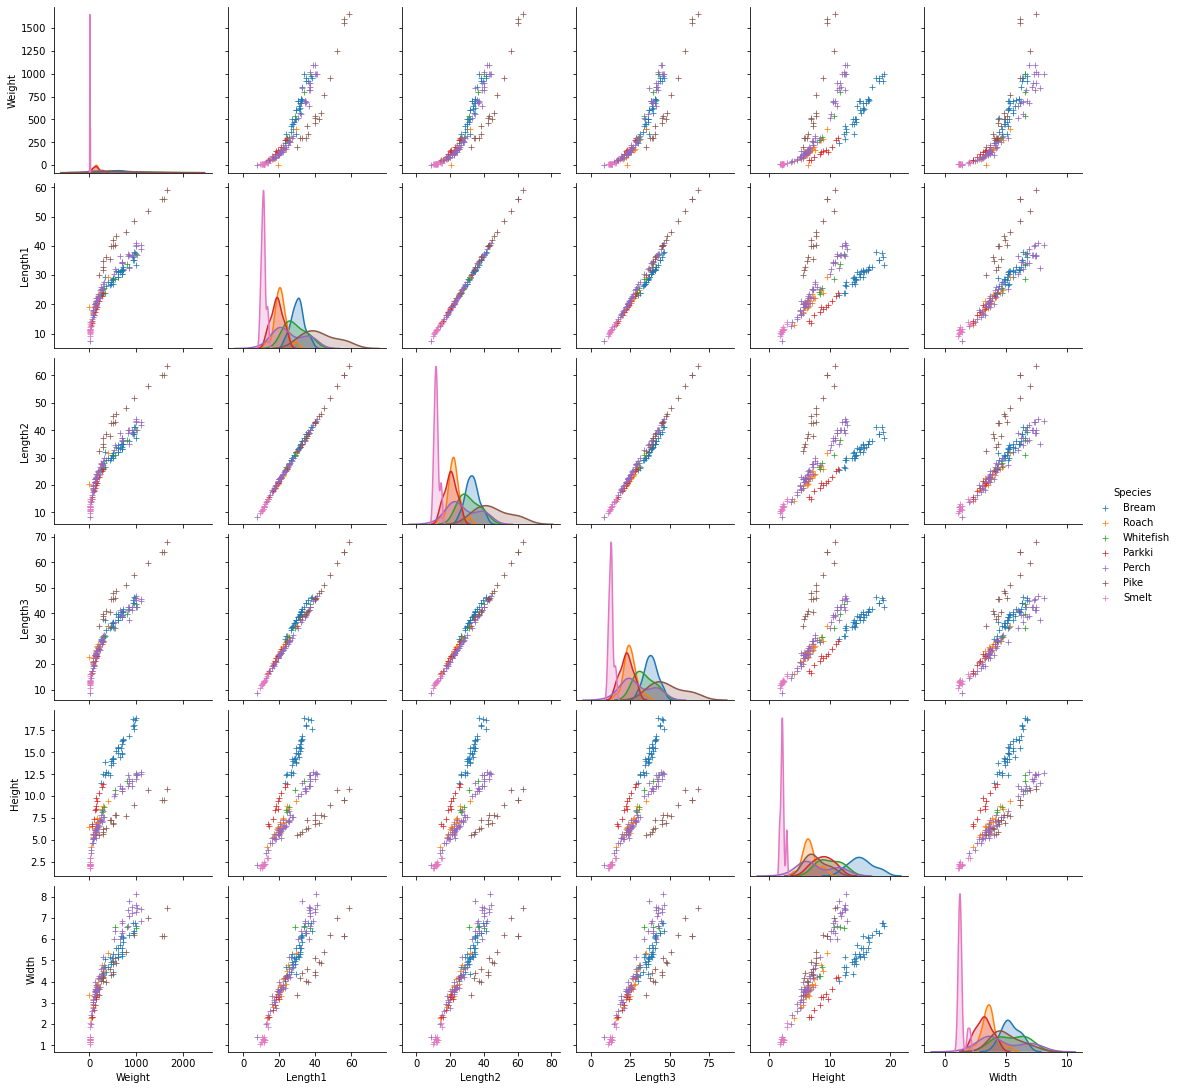

In [63]:
#temp=df.drop("Species_N",axis=1)
h=sns.pairplot(df,hue="Species",markers="+")
#plt.show()

# Data Preprocessing

In [64]:
LE=LabelEncoder()
df["Species_N"]=LE.fit_transform(df["Species"])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_N
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [65]:
X=df.iloc[:,1:7]
y=df[["Species","Species_N"]]

# Splitting the data

In [66]:
#spliting the data for classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# Model Evaluation

## SVM

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Bream       0.69      0.75      0.72        12
      Parkki       0.00      0.00      0.00         4
       Perch       0.42      0.89      0.57        18
        Pike       1.00      0.40      0.57         5
       Roach       0.00      0.00      0.00         7
       Smelt       0.00      0.00      0.00         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.51        53
   macro avg       0.30      0.29      0.27        53
weighted avg       0.39      0.51      0.41        53



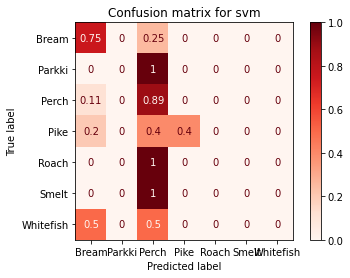

In [67]:
clf=SVC()

clf.fit(X_train,y_train["Species"])
y_pred=clf.predict(X_test)
print(classification_report(y_test["Species"],y_pred))
con_mat=plot_confusion_matrix(clf, X_test, y_test["Species"],
                                 cmap=plt.cm.Reds,
                                 normalize='true')
plt.title('Confusion matrix for svm')
plt.show(con_mat)

## KNN

In [68]:
k_range=list(range(1,26))
score=[]
for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train["Species"])
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test["Species"],y_pred))

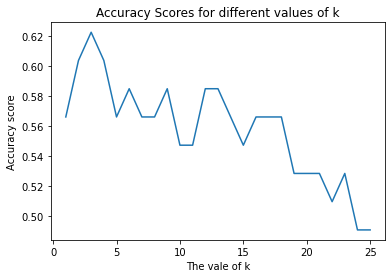

In [69]:
plt.plot(k_range,score)
plt.xlabel("The vale of k")
plt.ylabel("Accuracy score")
plt.title("Accuracy Scores for different values of k")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Bream       0.83      0.83      0.83        12
      Parkki       0.17      0.25      0.20         4
       Perch       0.57      0.72      0.63        18
        Pike       0.75      0.60      0.67         5
       Roach       0.50      0.14      0.22         7
       Smelt       0.83      1.00      0.91         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.62        53
   macro avg       0.52      0.51      0.50        53
weighted avg       0.61      0.62      0.60        53



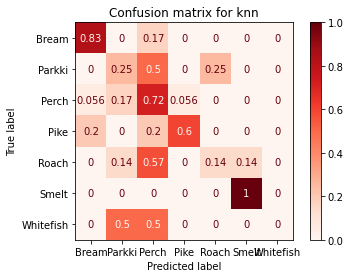

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train["Species"])
y_pred=knn.predict(X_test)
print(classification_report(y_test["Species"],y_pred))
con_mat=plot_confusion_matrix(knn, X_test, y_test["Species"],
                                 cmap=plt.cm.Reds,
                                 normalize="true")
plt.title('Confusion matrix for knn')
plt.show(con_mat)

## Random Forest

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        12
      Parkki       1.00      1.00      1.00         4
       Perch       0.71      0.83      0.77        18
        Pike       1.00      0.80      0.89         5
       Roach       0.67      0.57      0.62         7
       Smelt       0.83      1.00      0.91         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.83        53
   macro avg       0.74      0.74      0.74        53
weighted avg       0.81      0.83      0.81        53



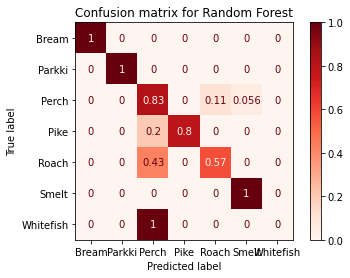

In [71]:
RC=RandomForestClassifier()

RC.fit(X_train,y_train["Species"])
y_pred=RC.predict(X_test)
print(classification_report(y_test["Species"],y_pred))
con_mat=plot_confusion_matrix(RC, X_test, y_test["Species"],
                                 cmap=plt.cm.Reds,
                                 normalize="true")
plt.title('Confusion matrix for Random Forest')
plt.show(con_mat)

## Gradient Boosting

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        12
      Parkki       0.75      0.75      0.75         4
       Perch       0.88      0.78      0.82        18
        Pike       1.00      0.80      0.89         5
       Roach       0.50      0.71      0.59         7
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.50      0.50      0.50         2

    accuracy                           0.83        53
   macro avg       0.80      0.79      0.79        53
weighted avg       0.85      0.83      0.84        53



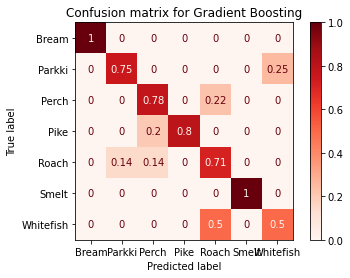

In [72]:
gb=GradientBoostingClassifier()

gb.fit(X_train,y_train["Species"])
y_pred=gb.predict(X_test)
print(classification_report(y_test["Species"],y_pred))
con_mat=plot_confusion_matrix(gb, X_test, y_test["Species"],
                                 cmap=plt.cm.Reds,
                                 normalize="true")
plt.title('Confusion matrix for Gradient Boosting')
plt.show(con_mat)

## Neural Network

In [73]:
#only 6 inputs are present 
input=Input(6,)
layer=Dense(128,activation="relu")(input)
layer=Dense(64,activation="relu")(layer)
layer=Dense(64,activation="relu")(layer)
output=Dense(7,activation="softmax")(layer)
model=Model(input,output)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 455       
Total params: 13,767
Trainable params: 13,767
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X_train,y_train["Species_N"],batch_size = 8,epochs=200,validation_data=(X_test,y_test["Species_N"]))

Epoch 1/200
14/14 [==============================] - 1s 24ms/step - loss: 9.0386 - accuracy: 0.2925 - val_loss: 4.2267 - val_accuracy: 0.5849
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 5.1887 - accuracy: 0.3962 - val_loss: 6.1913 - val_accuracy: 0.4151
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 3.2716 - accuracy: 0.3019 - val_loss: 3.6494 - val_accuracy: 0.5472
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 3.9247 - accuracy: 0.3962 - val_loss: 3.9238 - val_accuracy: 0.3208
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 3.2263 - accuracy: 0.3679 - val_loss: 3.0275 - val_accuracy: 0.3019
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 3.0169 - accuracy: 0.3491 - val_loss: 2.3719 - val_accuracy: 0.2830
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 2.1332 - accuracy: 0.4057 - val_loss: 4.7198 - val_accuracy: 0.3774
Epoch 8/200


14/14 [==============================] - 0s 4ms/step - loss: 1.2166 - accuracy: 0.6604 - val_loss: 1.1400 - val_accuracy: 0.6792
Epoch 59/200
14/14 [==============================] - 0s 4ms/step - loss: 0.8763 - accuracy: 0.7075 - val_loss: 1.1517 - val_accuracy: 0.6038
Epoch 60/200
14/14 [==============================] - 0s 5ms/step - loss: 0.9433 - accuracy: 0.6415 - val_loss: 1.1093 - val_accuracy: 0.6981
Epoch 61/200
14/14 [==============================] - 0s 5ms/step - loss: 1.1819 - accuracy: 0.5377 - val_loss: 1.6977 - val_accuracy: 0.4340
Epoch 62/200
14/14 [==============================] - 0s 5ms/step - loss: 1.1753 - accuracy: 0.6132 - val_loss: 1.3054 - val_accuracy: 0.6226
Epoch 63/200
14/14 [==============================] - 0s 4ms/step - loss: 0.8684 - accuracy: 0.6698 - val_loss: 1.7157 - val_accuracy: 0.6604
Epoch 64/200
14/14 [==============================] - 0s 4ms/step - loss: 1.0691 - accuracy: 0.6132 - val_loss: 1.4126 - val_accuracy: 0.6604
Epoch 65/200
14/14 

Epoch 116/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8302 - val_loss: 0.8171 - val_accuracy: 0.8302
Epoch 117/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8679 - val_loss: 0.7922 - val_accuracy: 0.8113
Epoch 118/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.8208 - val_loss: 0.8210 - val_accuracy: 0.7925
Epoch 119/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.8113 - val_loss: 0.8671 - val_accuracy: 0.8113
Epoch 120/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.8113 - val_loss: 1.0271 - val_accuracy: 0.7547
Epoch 121/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.8113 - val_loss: 0.9337 - val_accuracy: 0.7736
Epoch 122/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7547 - val_loss: 0.8336 - val_accuracy: 0.7925

Epoch 173/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7925 - val_loss: 0.9668 - val_accuracy: 0.7736
Epoch 174/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8302 - val_loss: 0.9843 - val_accuracy: 0.7547
Epoch 175/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8208 - val_loss: 0.8639 - val_accuracy: 0.8113
Epoch 176/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8396 - val_loss: 0.8328 - val_accuracy: 0.8491
Epoch 177/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8302 - val_loss: 0.8461 - val_accuracy: 0.8302
Epoch 178/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.8585 - val_loss: 0.8655 - val_accuracy: 0.8302
Epoch 179/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8774 - val_loss: 0.8178 - val_accuracy: 0.8302

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4
           2       0.65      0.83      0.73        18
           3       1.00      0.80      0.89         5
           4       0.40      0.29      0.33         7
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         2

    accuracy                           0.79        53
   macro avg       0.72      0.70      0.71        53
weighted avg       0.76      0.79      0.77        53



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'True Label')

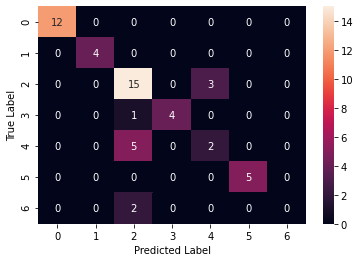

In [75]:
prob=model.predict(X_test)
y_pred = np.argmax(prob, axis=-1)
print(classification_report(y_test["Species_N"],y_pred))

cm=confusion_matrix(y_test["Species_N"],y_pred)
'''
con_mat=plot_confusion_matrix(model, X_test, y_test,
                              cmap=plt.cm.Reds,
                              normalize="true")
plt.title('Confusion matrix for Neural Network')
plt.show(con_mat)
'''
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Conclusion

From the model evaluation we are able to find that Neural Network performs better than any other model interms of accuracy but the class WhiteFish is not classfied at all. The reason for this might be because there is not enough WhiteFish sample data to train. But since Gradient Boosting classifier was able to predict the WhiteFish during testing and since it also has more than 80% accuracy, it is prefered over Neural Network

In [76]:
#train the model with entire dataset
gb.fit(X,y["Species"])
#saving the model
pickle_out=open("classifier.pkl","wb")
pickle.dump(gb,pickle_out)
pickle_out.close()

In [78]:
gb.predict([[242.0,23.2,25.4,30.0,11.5200,4.0200]])

array(['Bream'], dtype=object)